# Maching Learning Validation

Test some machine learning algorithms on some simple data sets.

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets as sd
import sklearn.linear_model
import matplotlib


# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## Generate Datasets
### Functions:
a) XOR

b) Circle

Datasets generation:
https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/

The dataset we generated has two classes, plotted as red and blue points. You can think of the blue dots as male patients and the red dots as female patients, with the x- and y- axis being medical measurements. 

Our goal is to train a Machine Learning classifier that predicts the correct class (male or female) given the x- and y- coordinates. Note that the data is not *linearly separable*, we can't draw a straight line that separates the two classes. WThis means that linear classifiers, such as Logistic Regression, won't be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In fact, that's one of the major advantages of Neural Networks. The hidden layer of a neural network will learn features for you.

Note : XOR function has only 4 points.

In [2]:
def gen_data(type):
    
    #XOR
    X = np.array([[0,1], [0,0],[1,1],[1,0]], np.int32)
    y=np.array([0,1,1,0])
    
    #CIRCLES
    if type==1:
        X, y = sd.make_circles(n_samples=500, noise=0.05)
    
    return X,y

### Decision Boundary

Helper function to plot the decision boundary

In [3]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

### Fit

fit function:

Input: X,y

type (0,1): Type of Machine learning
* 0 - MLP (Multilayer perceptron)
* 1 - Naive Bayes

plot (0,1): Plot decision boundary

* 0 - Do not plot
* 1 - Plot


In [33]:
def fit(X,y,Xtest,ytest,type=0,plot=0):
    from sklearn.neural_network import MLPClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
    from sklearn.metrics import average_precision_score, precision_recall_curve
    from sklearn.model_selection import cross_val_score

    fittype="MLP"
    fitter = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(6,3), random_state=1)
    
    if type==1:
        fittype="Naive Bayes"
        fitter=GaussianNB()
    
    if type==2:
        fittype="BDT"
        fitter=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

        
    fitter.fit(X, y)                         
#MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
#       beta_1=0.9, beta_2=0.999, early_stopping=False,
#       epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
#       learning_rate_init=0.001, max_iter=200, momentum=0.9,
#       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
#       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
#       warm_start=False)

    y_pred = fitter.predict_proba(Xtest)[:, 1]
#print(y,y_pred)

    preds = fitter.predict(Xtest)
#print(y,preds)
    print(confusion_matrix(ytest, preds))
    print("Accuracy:",accuracy_score(ytest, preds))
    
    plotfit(ytest,y_pred,fittype)
    
    if (plot==1):
        plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
        plot_decision_boundary(lambda x: fitter.predict(x))

### Plotting

Prediction analysis: Print and plot the fit metrics 

In [34]:
def plotfit(y,pred,label):
    
    from sklearn.metrics import roc_curve


    fpr_grd, tpr_grd, _ = roc_curve(y, pred)


    # The random forest model by itself
    plt.figure(1)
    plt.plot(fpr_grd, tpr_grd, label=label)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

    plt.figure(2)
    plt.xlim(0, 0.2)
    plt.ylim(0.8, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_grd, tpr_grd, label=label)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (zoomed in at top left)')
    plt.legend(loc='best')
    plt.show()

### XOR Function

[[2 0]
 [0 2]]
Accuracy: 1.0


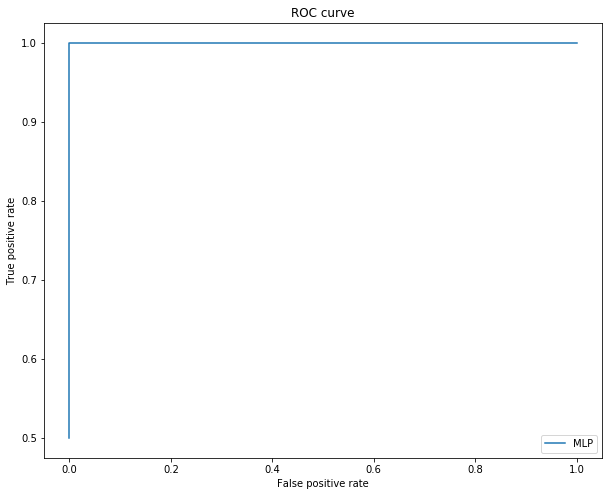

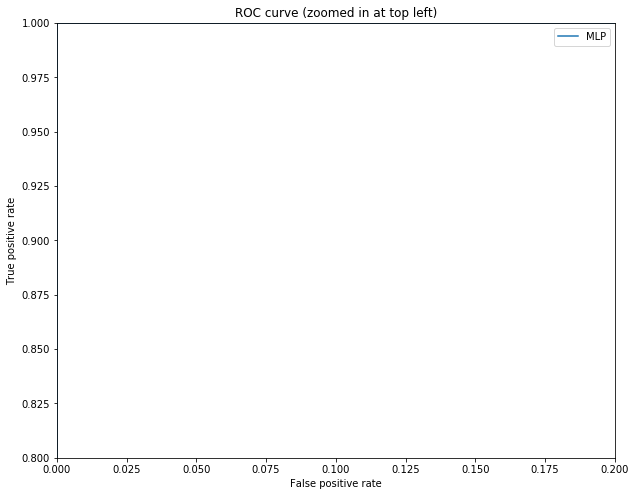

In [35]:
X,y = gen_data(0)

#print(X)
#print(y)

fit(X,y,X,y)

Cool! We have a pretty good separation.

### Circles

[[246   4]
 [  7 243]]
Accuracy: 0.978


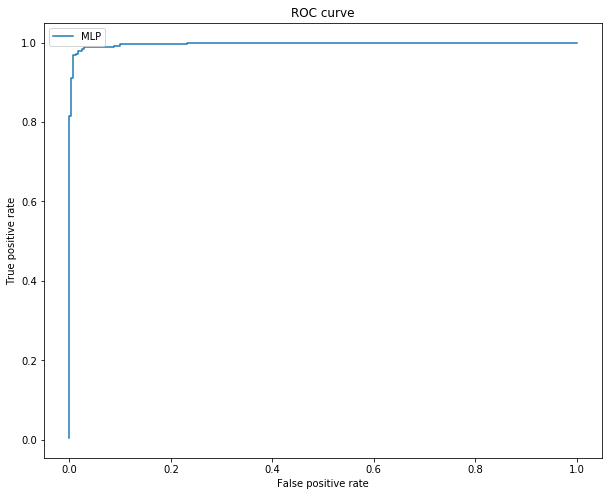

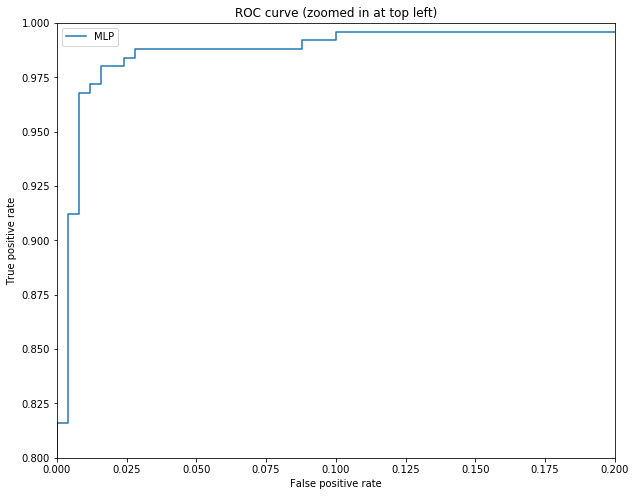

In [36]:
#Now generate circles and Fit
X,y = gen_data(1)

fit(X,y,X,y)

As one can see from the behaviour of the ROC curve, the model is doing pretty well. We have only a 2.5% FPR for close to 97.5% TPR.

### Breast Cancer Prediction

Use NN and Naive Bayes to do breast cancer prediction.

References:

This reference uses Naive Bayes:
https://www.digitalocean.com/community/tutorials/how-to-build-a-machine-learning-classifier-in-python-with-scikit-learn

In [37]:
data = sd.load_breast_cancer(return_X_y=False)
print(data.data.shape)

(569, 30)


In [38]:
X,y = data.data, data.target

#Alternatively
#labels = data['target']
#features = data['data']

In [39]:
label_names = data['target_names']
feature_names = data['feature_names']

print(label_names)
print(y[0])
print(feature_names[0])
print(X[0])

['malignant' 'benign']
0
mean radius
[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
   1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
   2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
   8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
   5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
   2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
   1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
   4.60100000e-01   1.18900000e-01]


In [40]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(X,
                                                          y,
                                                          test_size=0.33,
                                                          random_state=42)
X=train
y=train_labels
Xtest=test
ytest=test_labels

## Fitting 

Here we do the fits to the training sample. We can use various options for the fit. The fit calls the fitter function. Currently the prediction is on the training sample. This will be changed to the test sample.

### Options:

1. MLP = 0
2. NaiveBayes = 1
3. Adaboost Decision Tree = 2

[[ 65   2]
 [  5 116]]
Accuracy: 0.962765957447


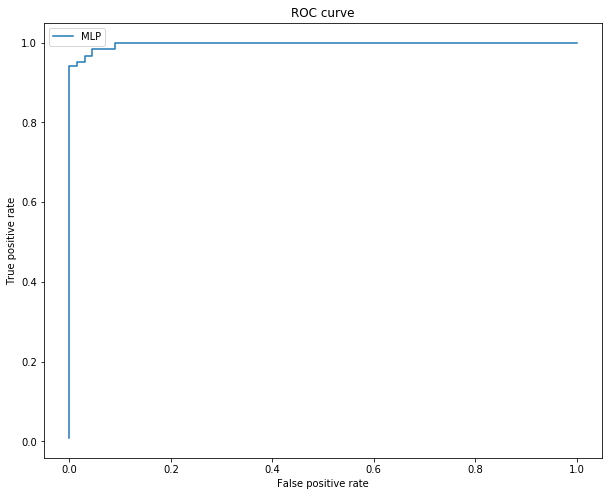

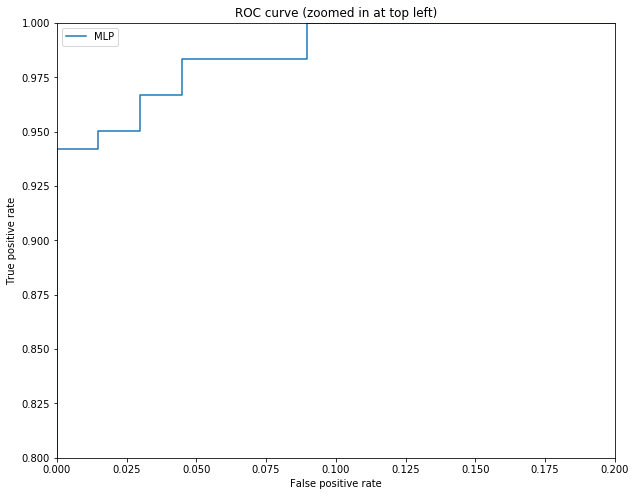

In [43]:
fit(X,y,Xtest,ytest,0)

[[ 61   6]
 [  5 116]]
Accuracy: 0.941489361702


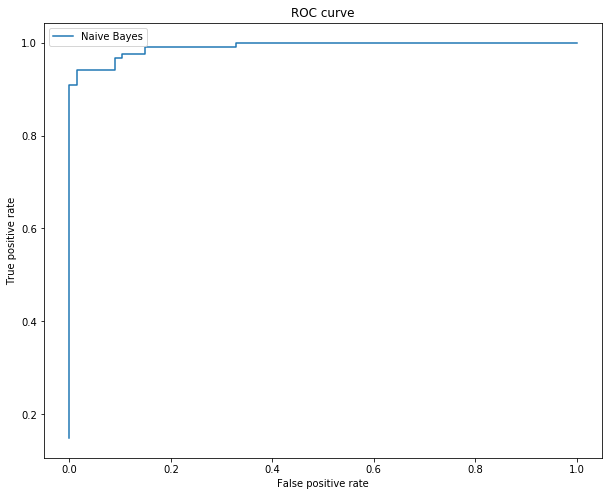

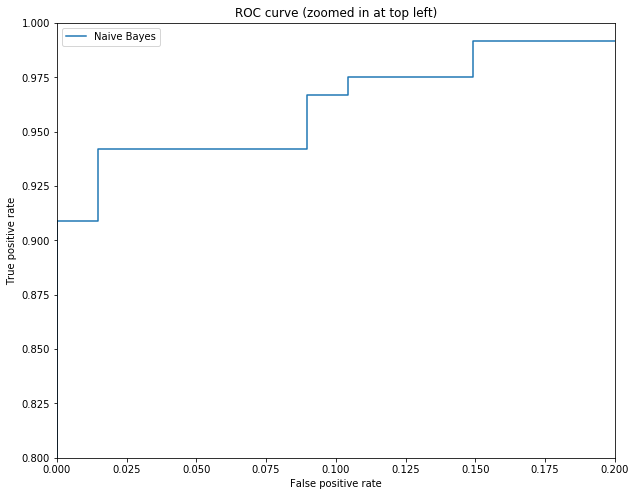

In [44]:
fit(X,y,Xtest,ytest,1)

[[ 66   1]
 [  2 119]]
Accuracy: 0.984042553191


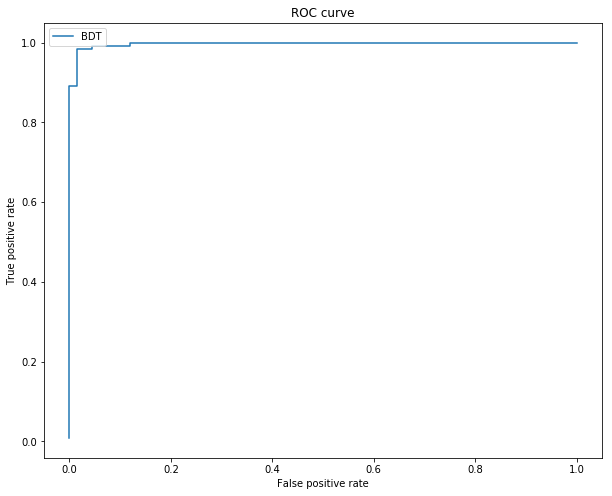

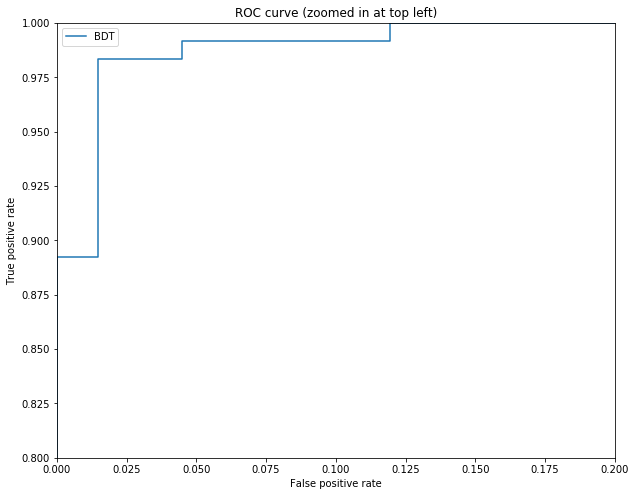

In [42]:
fit(X,y,Xtest,ytest,2)